In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the neutron data, skipping first two rows to get actual headers
neutron_data = pd.read_excel(
    'C:\\Priyanka\\hackthone-kansas\\Water-squad\\All excel data\\24 KSU_TAPS_Neutron_Tube Readings_VWC.xlsx',
    sheet_name='Sheet1',
    skiprows=2  # Adjust this if needed
)

# Convert 'Date' column to datetime format
neutron_data['Date'] = pd.to_datetime(neutron_data['Date'], errors='coerce')


In [2]:
neutron_data.columns

Index(['Date', 'Plot #', 'Block #', 6, 18, 30, 42, 54, 66, 78, 90, 102, 114], dtype='object')

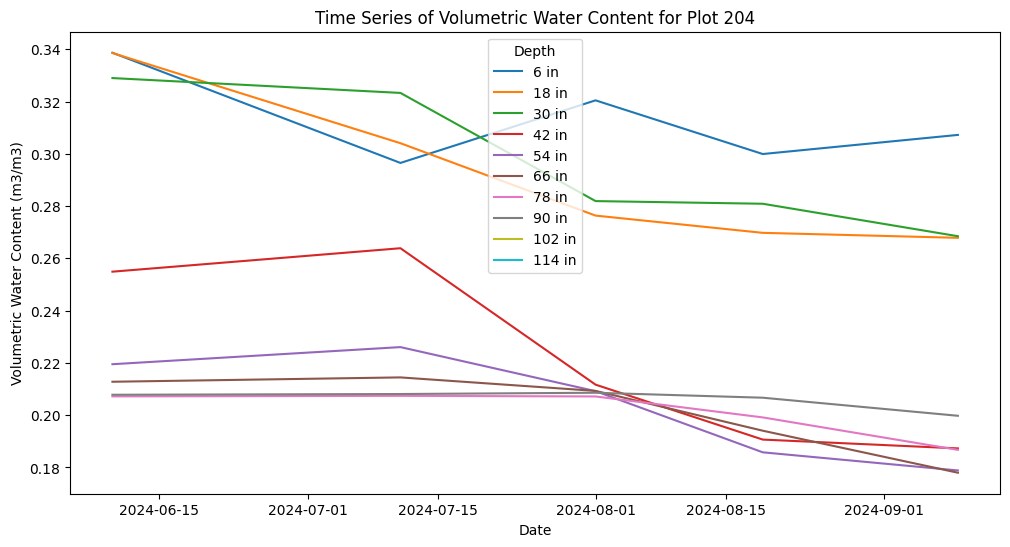

In [3]:
# List of depth columns in inches
depth_columns = [6, 18, 30, 42, 54, 66, 78, 90, 102, 114]

### 1. Time Series Analysis for VWC at Different Depths ###
def plot_time_series(plot_number):
    """Plot time series for all depths for a specific plot."""
    plt.figure(figsize=(12, 6))
    plot_data = neutron_data[neutron_data['Plot #'] == plot_number]
    for depth in depth_columns:
        plt.plot(plot_data['Date'], plot_data[depth], label=f"{depth} in")
    plt.title(f"Time Series of Volumetric Water Content for Plot {plot_number}")
    plt.xlabel("Date")
    plt.ylabel("Volumetric Water Content (m3/m3)")
    plt.legend(title="Depth")
    plt.show()

# Example usage:
plot_time_series(plot_number=204)

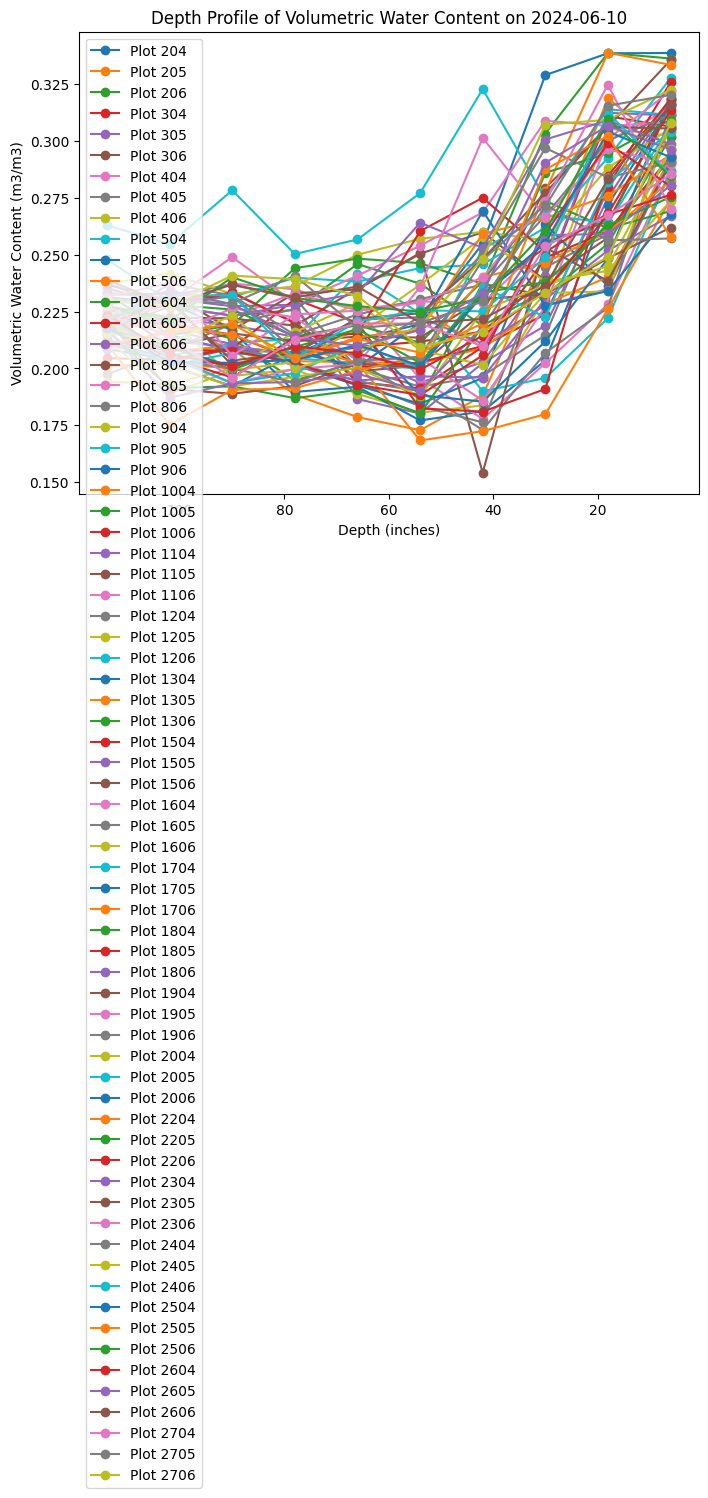

In [4]:
### 2. Depth Profile on Specific Dates ###
def plot_depth_profile(date):
    """Plot VWC vs Depth on a specific date across all plots."""
    plt.figure(figsize=(8, 6))
    date_data = neutron_data[neutron_data['Date'] == date]
    for _, row in date_data.iterrows():
        plt.plot([int(depth) for depth in depth_columns], row[depth_columns], marker='o', label=f"Plot {row['Plot #']}")
    plt.gca().invert_xaxis()  # Invert to show surface at top
    plt.title(f"Depth Profile of Volumetric Water Content on {date.strftime('%Y-%m-%d')}")
    plt.xlabel("Depth (inches)")
    plt.ylabel("Volumetric Water Content (m3/m3)")
    plt.legend()
    plt.show()
    
# Example usage:
plot_depth_profile(date=datetime(2024, 6, 10))

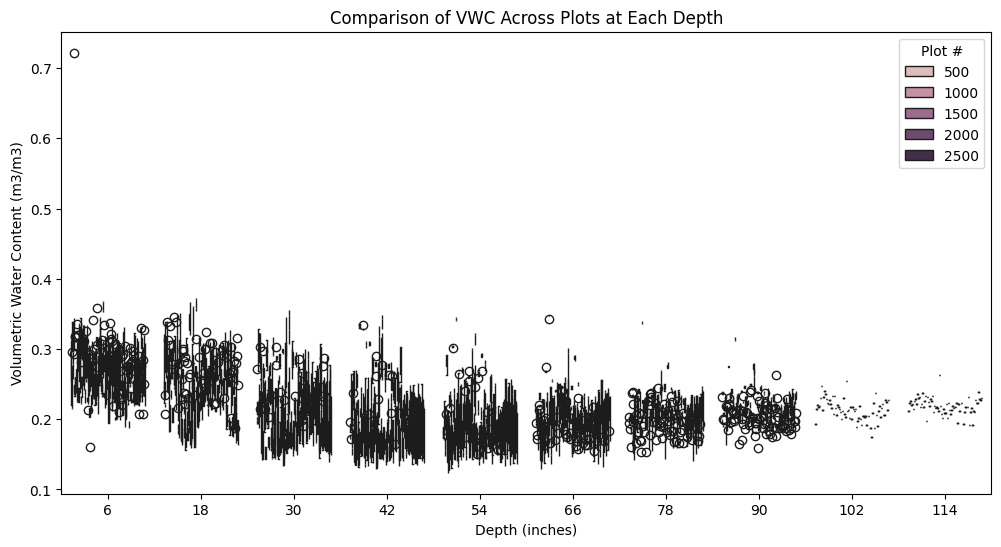

In [5]:
### 3. Comparison of VWC across Plots at Each Depth ###
def compare_vwc_across_plots():
    """Boxplot to compare VWC across plots at each depth."""
    melted_data = neutron_data.melt(id_vars=['Date', 'Plot #'], value_vars=depth_columns, var_name='Depth', value_name='VWC')
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=melted_data, x='Depth', y='VWC', hue='Plot #')
    plt.title("Comparison of VWC Across Plots at Each Depth")
    plt.xlabel("Depth (inches)")
    plt.ylabel("Volumetric Water Content (m3/m3)")
    plt.legend(title="Plot #")
    plt.show()
    
# Example usage:
compare_vwc_across_plots()

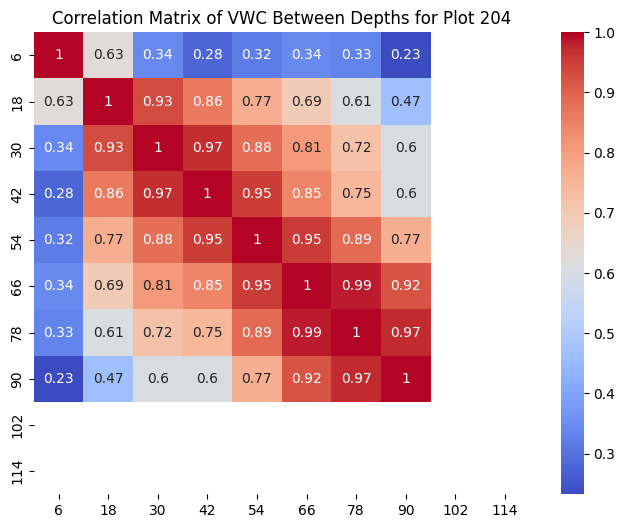

In [6]:
### 4. Correlation Analysis Between Depths ###
def plot_correlation_matrix(plot_number):
    """Plot correlation matrix for VWC between different depths for a specific plot."""
    plot_data = neutron_data[neutron_data['Plot #'] == plot_number]
    correlation_matrix = plot_data[depth_columns].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.title(f"Correlation Matrix of VWC Between Depths for Plot {plot_number}")
    plt.show()
    
# Example usage:
plot_correlation_matrix(plot_number=204)

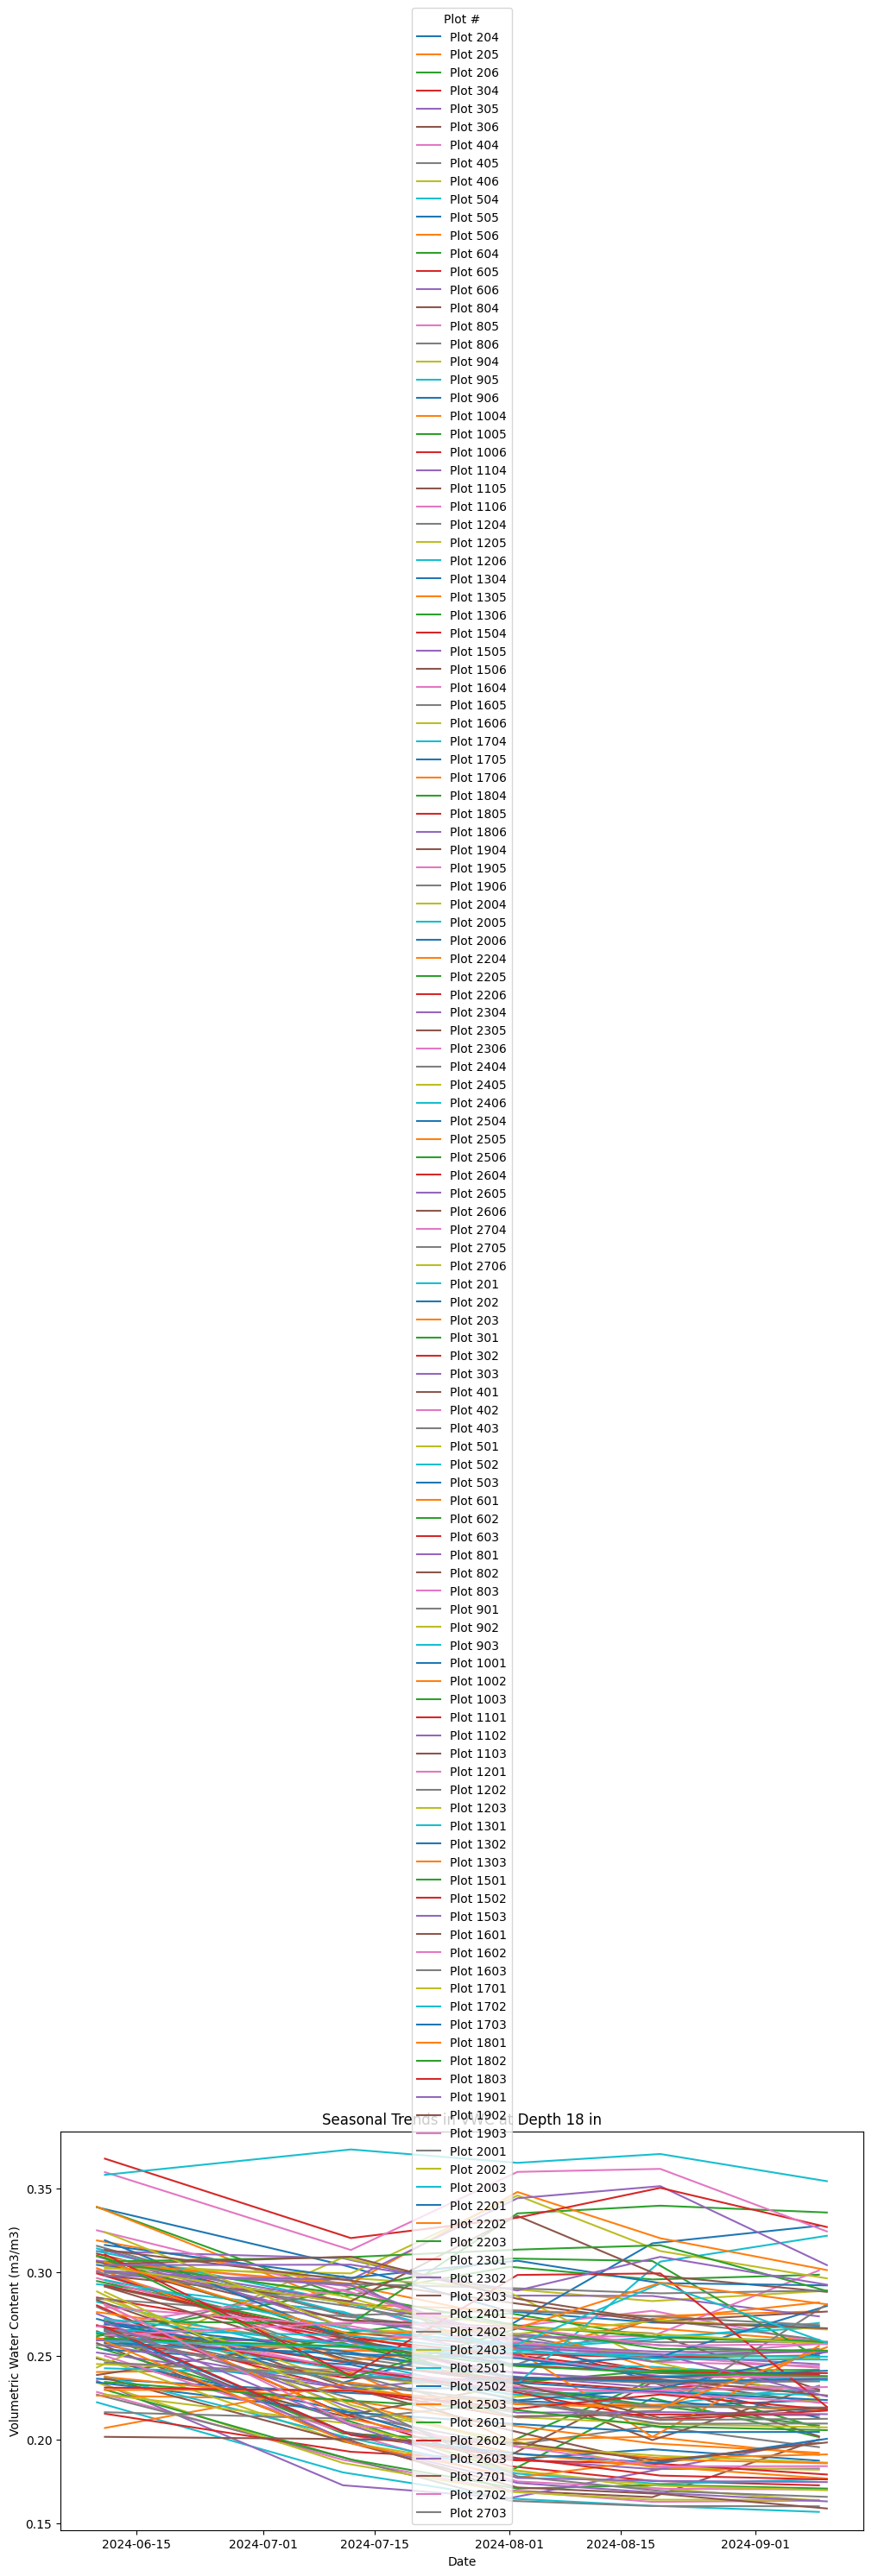

In [7]:
### 5. Seasonal Trends in VWC ###
def plot_seasonal_trend(depth):
    """Plot seasonal trends in VWC for a specific depth across all plots."""
    plt.figure(figsize=(12, 6))
    for plot_number in neutron_data['Plot #'].unique():
        plot_data = neutron_data[neutron_data['Plot #'] == plot_number]
        plt.plot(plot_data['Date'], plot_data[depth], label=f"Plot {plot_number}")
    plt.title(f"Seasonal Trends in VWC at Depth {depth} in")
    plt.xlabel("Date")
    plt.ylabel("Volumetric Water Content (m3/m3)")
    plt.legend(title="Plot #")
    plt.show()

# Example usage:
plot_seasonal_trend(depth= 18)

In [ ]:
# Example usage:
compare_vwc_across_plots()